In [6]:
import source.utilities as util
import source.loader as load
import source.analyzer as analyzer

Total Income: 12559.98
Income: category
INCOME    12559.08
OTHER         0.90
Name: transaction, dtype: float64
Total Expense: 13231.08
Expense: category
CREDIT CARD    -1026.34
EXPENSE        -2309.36
PROPERTY       -9252.89
SUBSCRIPTION     -34.99
UTILITIES       -607.50
Name: transaction, dtype: float64
Category: category
CREDIT CARD      -7.76%
EXPENSE         -17.45%
PROPERTY        -69.93%
SUBSCRIPTION     -0.26%
UTILITIES        -4.59%
Name: transaction, dtype: object


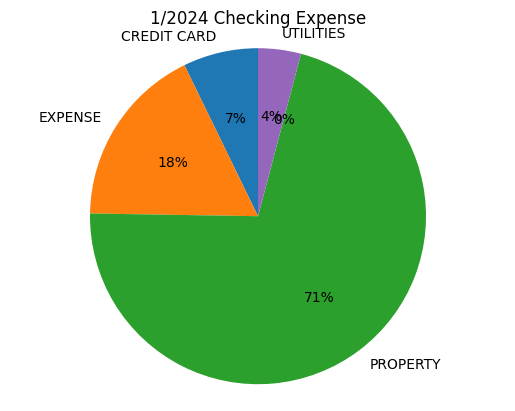

In [7]:
analyzer.analyzeChecking(1, 2024)

The file './input/credit/td/1_2024.csv' does not exist.
Total Expense: 1597.08
Expense: category
COMMUTE           25.00
DINING           170.97
GROCERY            6.29
HEALTH CARE      267.17
INCOME             2.18
SHOPPING        1066.63
SUBSCRIPTION      33.84
UTILITIES         25.00
Name: transaction, dtype: float64
Category: category
COMMUTE          1.57%
DINING          10.71%
GROCERY          0.39%
HEALTH CARE     16.73%
INCOME           0.14%
SHOPPING        66.79%
SUBSCRIPTION     2.12%
UTILITIES        1.57%
Name: transaction, dtype: object


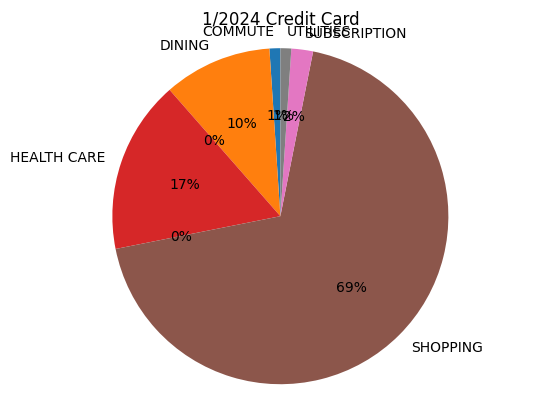

In [8]:
analyzer.analyzeCreditCard(1, 2024)

In [ ]:
# Import AMEX
amexDf = load.importAmex('./input/credit/amex/12_2023.csv');
df = util.sanitizeDataframe(amexDf, sortBy='transaction');

# df.loc[:, 'transaction'] = df['transaction'].abs()
# df = df.sort_values(by=['category', 'transaction'])
# print(tabulate(df, headers='keys', tablefmt='pretty'))

# # Format the DataFrame as a table using tabulate
# formatted_table = tabulate(df, headers='keys', tablefmt='pretty')

# # Save the formatted table to a text file
# with open('./output/amex_credit_2023.txt', 'w') as file:
#     file.write(formatted_table)

# making transactions to be positive
# df = filter_df_at_month(df)
util.exportDataframe(df, 'amex')

totalExpense = df.groupby('category')['transaction'].sum()
print(f'Expense: {totalExpense}')

util.plotDataframe(df, '2023 Amex Credit Card')

In [ ]:
# Import Wells Fargo
wfDf = load.importWF('./input/wf_credit_2023.csv');
df = util.sanitizeDataframe(wfDf);

# making transactions to be positive
# df = filter_df_at_month(df)
util.exportDataframe(df, 'wf')

totalExpense = df.groupby('category')['transaction'].sum()
print(f'Expense: {totalExpense}')

util.plotDataframe(df, '2023 WF Credit Card')